In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
houses = pd.read_csv('/content/Erdeni_Houses_train.csv')
data = pd.DataFrame(data = houses)
data

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,Price
0,0,66547.016454,5.846095,6.847298,4.13,27850.822901,"2288 Gary Square Apt. 812\nWest Jose, PR 78536...",1.094880e+06
1,1,53722.008599,6.401391,7.787764,3.30,47649.224665,USS Williams\nFPO AE 65283,1.300389e+06
2,2,64838.492899,6.437157,8.699544,4.02,32921.010068,Unit 2193 Box 7909\nDPO AA 47323-2101,1.382172e+06
3,3,67097.092120,6.086754,7.211963,3.05,27191.506877,"052 Thomas Square Apt. 034\nWrightmouth, OR 04272",1.027428e+06
4,4,75245.465436,8.167820,7.420100,3.42,37410.669928,"879 Martha Route Suite 031\nNew Nichole, VI 60708",1.562887e+06
...,...,...,...,...,...,...,...,...
3995,3995,76223.561256,6.371627,5.342217,2.42,30165.337445,"8456 Rodgers Burg Apt. 215\nSouth Michelle, NM...",1.023944e+06
3996,3996,56685.014442,6.958045,7.502115,3.38,43322.166854,"8584 Darrell Groves\nBennettberg, SD 72404-6826",1.223101e+06
3997,3997,66195.337714,6.507971,6.611861,3.14,37288.923574,"8367 Manuel Road\nNathanfort, AS 36077-1481",1.318598e+06
3998,3998,58694.515017,7.394768,9.269453,4.32,49960.977236,Unit 7385 Box 9302\nDPO AP 21450,1.708631e+06


In [ ]:
data[['Price']].describe()

,Price
count,4.000000e+03
mean,1.229577e+06
std,3.536607e+05
min,1.593866e+04
25%,9.942201e+05
50%,1.226441e+06
75%,1.471210e+06
max,2.370231e+06


In [ ]:
set(data['Price'].values)

<ipython-input-399-6e15c17a5afd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


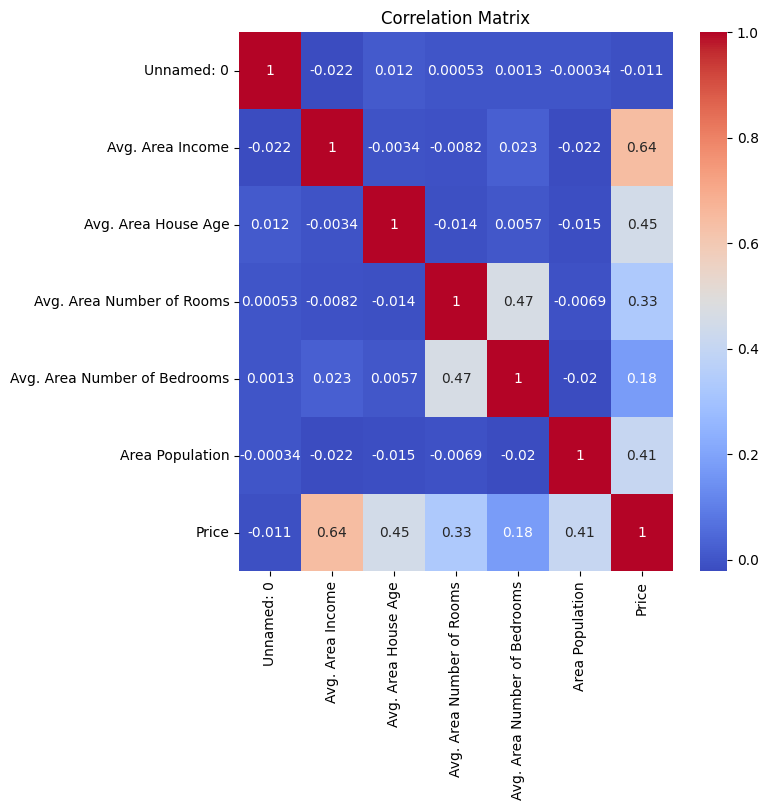

In [ ]:

# Построение корреляционной матрицы
correlation_matrix = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_without_str = data[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population'	, 'Price']]

In [ ]:
# Get the top 6 most correlated features for the "GRADE" column
top_corr_features = correlation_matrix['Price'].sort_values(ascending=False)[1:7]

# Print the top 6 most correlated features
print(top_corr_features)

Avg. Area Income                0.641931
Avg. Area House Age             0.449148
Area Population                 0.406757
Avg. Area Number of Rooms       0.330724
Avg. Area Number of Bedrooms    0.176661
Unnamed: 0                     -0.010807
Name: Price, dtype: float64


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_without_str.values)

In [ ]:
df_data_scaled = pd.DataFrame(data_scaled, columns=df_without_str.columns)

In [ ]:
data_X = data[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']]
data_X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,66547.016454,5.846095,6.847298,4.13,27850.822901
1,53722.008599,6.401391,7.787764,3.30,47649.224665
2,64838.492899,6.437157,8.699544,4.02,32921.010068
3,67097.092120,6.086754,7.211963,3.05,27191.506877
4,75245.465436,8.167820,7.420100,3.42,37410.669928
...,...,...,...,...,...
3995,76223.561256,6.371627,5.342217,2.42,30165.337445
3996,56685.014442,6.958045,7.502115,3.38,43322.166854
3997,66195.337714,6.507971,6.611861,3.14,37288.923574
3998,58694.515017,7.394768,9.269453,4.32,49960.977236


In [ ]:
data_Y = data[['Price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, random_state=42, test_size=0.1)

In [ ]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2957,61641.151657,5.309621,7.272801,3.21,48898.417103
1096,82710.589816,6.236987,5.086434,4.43,44768.688110
1945,77504.804234,5.688957,7.288819,5.29,41864.786245
1032,71277.268429,5.411877,6.286579,3.17,36325.787618
1018,53547.018020,5.847393,8.243485,3.14,57979.856197
...,...,...,...,...,...
1130,77545.925694,6.095808,7.896170,5.47,52740.409174
1294,62699.439217,6.358747,7.460135,4.28,37816.337696
860,69048.162971,5.039487,6.114323,2.50,41773.514639
3507,77013.180604,7.398134,7.517189,5.23,43432.879793


In [ ]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
555,83406.743316,5.280739,7.341589,6.29,25350.735473
3491,74230.517961,6.471662,7.364007,5.09,19108.534857
527,71743.483823,8.182598,7.658973,5.01,44674.891028
3925,61807.484931,5.606859,8.203353,5.46,44586.724954
2989,57869.984492,5.135883,6.232451,3.13,44474.701879
...,...,...,...,...,...
2238,66626.539645,4.623910,6.335303,3.39,20257.790363
3123,74854.100107,4.604999,7.679231,4.06,50538.013536
3684,79550.641384,6.637634,7.531228,4.05,43636.504491
1805,72660.157636,5.447651,6.130977,4.39,48711.554696


In [ ]:
y_test.describe()

,Price
count,4.000000e+02
mean,1.226659e+06
std,3.450579e+05
min,3.114052e+04
25%,9.966760e+05
50%,1.220989e+06
75%,1.442643e+06
max,2.152959e+06


# LinearRegression - лучший результат: 79716 (MAE), 98754 (RMSE)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linmodel = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = linmodel.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error

In [ ]:
MAE(y_test, y_pred)

79716.08702370367

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

98754.49611773157

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-417-204a4c609928>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree = RandomForestRegressor().fit(X_train, y_train)


In [ ]:
y_pred3 = tree.predict(X_test)

In [ ]:
MAE(y_test, y_pred3)

93179.00759332314

In [ ]:
mean_squared_error(y_test, y_pred3, squared=False)

117545.57605303238

# GradientBoostingRegressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradient = GradientBoostingRegressor().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred4 = gradient.predict(X_test)

In [ ]:
MAE(y_test, y_pred4)

85331.43475426408

In [ ]:
mean_squared_error(y_test, y_pred4, squared=False)

106878.21434066536

# GridSearch for GradientBoostingRegressor


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GradientBoostingRegressor()

In [ ]:
 parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid = GridSearchCV(clf, parameters, cv=2, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.1}

In [ ]:
grad = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 1000, subsample = 0.1)

In [ ]:
gradient = grad.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred5 = gradient.predict(X_test)

In [ ]:
MAE(y_test, y_pred5)

83696.3938699887

In [ ]:
mean_squared_error(y_test, y_pred5, squared=False)

102837.76965622515

# GridSearch for Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5

In [ ]:
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
grid_cv_model.best_params_

{'alpha': 0.0001}

In [ ]:
ridg = Ridge(alpha = 0.0001)

In [ ]:
ridg_fir = ridg.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred6 = ridg_fir.predict(X_test)

In [ ]:
MAE(y_test, y_pred6)

79716.08674747689

# SVR

In [ ]:
from sklearn import svm

In [ ]:
regr = svm.SVR()
regr.fit(X_train, y_train.values.ravel())

SVR()

In [ ]:
y_pred8 = regr.predict(X_test)

In [ ]:
MAE(y_test, y_pred8)

274352.49369077256